Léa ZADIKIAN - Novembre 2022

# Projet n°4 : Anticipez les besoins en consommation de bâtiments
# Notebook prédiction de la consommation d'énergie
La prédiction des émissions est réalisée dans un Notebook séparé.

Données et définition des variables : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

**Objectif** : prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation de la ville de Seattle, pour lesquels elles n’ont pas encore été mesurées.

# Sommaire :

<a href="#C1">1. Première itération</a>

1.1 Import et préparation des données
- Importation du jeu de données cleanné
- Préparation des données : standardisation, séparation jeu de d'entraînement / jeu de test

1.2 Approche naïve : Dummy regressor
    
1.3 Modèle linéaire : Elastic Net
    
1.4. Modèle non linéaire : Random Forest
    
<a href="#C2">2.Deuxième itération </a>

2.1 Import et préparation des données

2.2 Approche naïve : Dummy regressor

2.3 Modèle linéaire : Elastic Net

2.4 Modèle non linéaire : Random Forest

<a href="#C3">3.Troisième itération : intérêt de ENERGYSTAR Score</a>


In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn import model_selection
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn import linear_model
from sklearn import kernel_ridge

# <a name="C1">1. Première itération </a>
## 1.1 Import et préparation des données

### 1.1.1 Import des données

In [2]:
#Lecture et affichage du fichier '2016_Building_Energy_Benchmarking_clean_model_1.csv'
data=pd.read_csv('2016_Building_Energy_Benchmarking_clean_model_1.csv')
data

,log_NumberofBuildings,log_NumberofFloors,log_PropertyGFATotal,log_PropertyGFAParking,log_TotalGHGEmissions,log_SiteEnergyUse(kBtu),x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,...,x3_1920's,x3_1930's,x3_1940's,x3_1950's,x3_1960's,x3_1970's,x3_1980's,x3_1990's,x3_2000's,x3_2010's
0,1.0,3.700440,16.432330,0.000000,7.971429,22.784838,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.584963,16.660205,13.878913,8.213639,22.999884,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,5.392317,19.866819,17.585777,11.029480,26.113208,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.459432,15.904094,0.000000,8.167067,22.695954,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,4.247928,17.421777,15.920004,8.983022,23.756602,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1.0,1.000000,14.156557,0.000000,4.414812,19.830099,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1543,1.0,1.000000,13.965874,0.000000,5.051807,19.857989,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1544,1.0,1.000000,13.683653,0.000000,7.810829,22.459114,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1545,1.0,1.000000,13.783612,0.000000,4.530445,19.456579,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 1.1.2 Préparation des données

#### Séparation features / tagets

In [3]:
#Target y : SiteEnergyUse(kBtu)==> CONSOMMATION D'ENERGIE
y=data['log_SiteEnergyUse(kBtu)'].values
y.shape

(1547,)

In [4]:
# Dataframe des features, on retire les colonnes correspondant aux 2 targets
model_1_data=data.copy()
targets=['log_SiteEnergyUse(kBtu)','log_TotalGHGEmissions']
model_1_data.drop(targets,axis=1, inplace=True)
model_1_data

,log_NumberofBuildings,log_NumberofFloors,log_PropertyGFATotal,log_PropertyGFAParking,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Distribution Center,...,x3_1920's,x3_1930's,x3_1940's,x3_1950's,x3_1960's,x3_1970's,x3_1980's,x3_1990's,x3_2000's,x3_2010's
0,1.0,3.700440,16.432330,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.584963,16.660205,13.878913,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,5.392317,19.866819,17.585777,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.459432,15.904094,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,4.247928,17.421777,15.920004,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1.0,1.000000,14.156557,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1543,1.0,1.000000,13.965874,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1544,1.0,1.000000,13.683653,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1545,1.0,1.000000,13.783612,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
model_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   log_NumberofBuildings           1547 non-null   float64
 1   log_NumberofFloors              1547 non-null   float64
 2   log_PropertyGFATotal            1547 non-null   float64
 3   log_PropertyGFAParking          1547 non-null   float64
 4   x0_Campus                       1547 non-null   float64
 5   x0_NonResidential               1547 non-null   float64
 6   x0_Nonresidential COS           1547 non-null   float64
 7   x0_Nonresidential WA            1547 non-null   float64
 8   x0_SPS-District K-12            1547 non-null   float64
 9   x1_Distribution Center          1547 non-null   float64
 10  x1_Hospital                     1547 non-null   float64
 11  x1_Hotel                        1547 non-null   float64
 12  x1_K-12 School                  15

In [6]:
#Récupération des valeurs des features
X=model_1_data.values
X.shape

(1547, 55)

#### Standardisation des données

In [7]:
#Standardisation des données avec StandardScaler()
std_scale = preprocessing.StandardScaler()
X= std_scale.fit_transform(X)
X

array([[-0.04246324,  1.80319003,  0.35194475, ..., -0.32888629,
        -0.33607981, -0.17701224],
       [-0.04246324,  1.68388254,  0.51427078, ...,  3.0405646 ,
        -0.33607981, -0.17701224],
       [-0.04246324,  3.55118577,  2.79849165, ..., -0.32888629,
        -0.33607981, -0.17701224],
       ...,
       [-0.04246324, -0.9868208 , -1.60606654, ..., -0.32888629,
        -0.33607981, -0.17701224],
       [-0.04246324, -0.9868208 , -1.53486067, ..., -0.32888629,
        -0.33607981, -0.17701224],
       [-0.04246324, -0.9868208 , -1.26936336, ..., -0.32888629,
        -0.33607981, -0.17701224]])

#### Split du jeu de données en données d'entraînement et données de test

In [8]:
# Split du jeu de données en données d'entraînement et données de test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42) # 20% des données dans le jeu de test
print("Taille du jeu d'entraînement X_train : "+ str(X_train.shape))
print("Taille du jeu de test X_test: "+ str(X_test.shape))
print("Taille de y_train : "+ str(y_train.shape))
print("Taille de y_test : "+ str(y_test.shape))

Taille du jeu d'entraînement X_train : (1237, 55)
Taille du jeu de test X_test: (310, 55)
Taille de y_train : (1237,)
Taille de y_test : (310,)


# 1.2  Approche Naïve : DummyRegressor
Regressor that makes predictions using simple rules.This regressor is useful as a simple baseline to compare with other (real) regressors.
Strategy to use to generate predictions : {“mean”, “median”, “quantile”, “constant”}, default=”mean”


In [9]:
y_train.mean()

21.57985758757657

In [10]:
#Strategie : Moyenne
dum_reg = DummyRegressor(strategy='mean')

# Entraînement
dum_reg.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum_reg.predict(X_test)

# Evaluation

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)) ))
print("R2 : {:.2f}".format(dum_reg.score(X_test,y_test) ))


RMSE : 1.92
R2 : -0.00


Comme attendu, on trouve R2=0. R2 compare la performence du modèle par rapport une prédiction par la moyenne, hors notre modèle est une prédiction par la moyenne.

## 1.3. Modèle linéaire : ElasticNet

ElasticNet is a linear regression model trained with both l1 and l2 norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of  and  using the l1_ratio parameter.

Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [11]:
#On fixe les valeurs des hyperparamètres à tester
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #alpha, coef de régularisation. Si égale à 0, équivaut à régresison linéaire simple
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , si égal à 1 équivaut à un Lasso, si égal 0 à un Ridge


# On choisit un score à optimiser, ici R2
score = 'r2'

#On crée une grille avec recherche d'hyperparamètres par validation croisée
elastic_net_grid = model_selection.GridSearchCV(estimator = linear_model.ElasticNet(),  # ElasticNet regression
                      param_grid = parameters,  # hyperparamètres à tester
                    scoring = score,  # score à optimiser R2

                      #scoring = 'neg_root_mean_squared_error',  # score à optimiserRMSE
                      cv=5, # nombre de folds de validation croisée
                      verbose=0
                     )

# Optimisation sur le jeu d'entraînement
elastic_net_grid.fit(X_train, y_train)



# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        elastic_net_grid.cv_results_['mean_test_score'], # score moyen
        elastic_net_grid.cv_results_['std_test_score'],  # écart-type du score
        elastic_net_grid.cv_results_['params']           # valeur de l'hyperparamètre
):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(score,
                                                   mean,
                                                   std*2,
                                                   params))


C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.126e+02, tolerance: 3.536e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.959e+02, tolerance: 3.515e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted usi

C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.752e+01, tolerance: 3.536e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+01, tolerance: 3.515e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.137e+02, tolerance: 3.536e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.969e+02, tolerance: 3.515e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted usi

C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.917e-01, tolerance: 3.524e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.129e-01, tolerance: 3.536e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.527e+03, tolerance: 3.536e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.506e+03, tolerance: 3.515e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted usi

Résultats de la validation croisée :
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.0}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.1}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.2}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.30000000000000004}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.4}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.5}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.6000000000000001}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.7000000000000001}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.8}
r2 = 0.741 (+/-0.035) for {'alpha': 0.0001, 'l1_ratio': 0.9}
r2 = 0.741 (+/-0.035) for {'alpha': 0.001, 'l1_ratio': 0.0}
r2 = 0.741 (+/-0.035) for {'alpha': 0.001, 'l1_ratio': 0.1}
r2 = 0.741 (+/-0.035) for {'alpha': 0.001, 'l1_ratio': 0.2}
r2 = 0.741 (+/-0.035) for {'alpha': 0.001, 'l1_ratio': 0.30000000000000004}
r2 = 0.741 (+/-0.035) for {'alpha': 0.001, 'l1_rati

In [12]:
#Résultats complets du GridSearch
elastic_net_grid.cv_results_

{'mean_fit_time': array([0.03619814, 0.03599954, 0.03579922, 0.03579936, 0.03539882,
        0.03499842, 0.0355988 , 0.03519788, 0.03519964, 0.03379908,
        0.03619947, 0.0335988 , 0.03099842, 0.02719755, 0.02579842,
        0.02579746, 0.02799969, 0.02939911, 0.02759886, 0.02639828,
        0.03539982, 0.00400014, 0.00359988, 0.00339904, 0.00379977,
        0.00379896, 0.00459967, 0.00379939, 0.00279975, 0.00219922,
        0.03559794, 0.00120058, 0.00099998, 0.00079994, 0.00080013,
        0.00079994, 0.00059996, 0.00099993, 0.00040007, 0.        ,
        0.0357985 , 0.0010005 , 0.00100002, 0.00040002, 0.00040007,
        0.00099998, 0.        , 0.00099993, 0.00020003, 0.00059996,
        0.03559785, 0.        , 0.00059996, 0.00039997, 0.00019994,
        0.00080004, 0.0006    , 0.00020008, 0.00059996, 0.00059996,
        0.03579793, 0.0006    , 0.0006    , 0.00020003, 0.00059991,
        0.00059991, 0.00019999, 0.00040002, 0.00059996, 0.00040002]),
 'std_fit_time': array([3.654

In [13]:
# Affichage les hyperparamètres optimaux
print("Les meilleurs hyperparamètres pour le modèle de regression linéaire Elastic Net :")
elastic_net_grid.best_params_

Les meilleurs hyperparamètres pour le modèle de regression linéaire Elastic Net :


{'alpha': 0.01, 'l1_ratio': 0.9}

In [14]:
#prédiction sur le jeu de test avec les meilleurs paramètres
y_el_net_pred=elastic_net_grid.predict(X_test)

In [15]:
# Evaluation du modèle Elastic Net sur le jeu de test avec les meilleurs hyperparametres
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_el_net_pred)) ))
print("R2 test : {:.2f}".format(elastic_net_grid.score(X_test,y_test) ))
print("R2 train : " + str(elastic_net_grid.best_score_))
print("Temps d'execution :"+ str (elastic_net_grid.cv_results_['mean_fit_time'].mean())+ " s" )

RMSE : 1.06
R2 test : 0.70
R2 train : 0.7424963253819621
Temps d'execution :0.01250805105481829 s


# 1.4 Modèle non linéaire

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

#On fixe les valeurs des hyperparamètres à tester
parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
}


# On choisit un score à optimiser, ici R2
score = 'r2'

#On crée une grille avec recherche d'hyperparamètres par validation croisée

random_forest_grid = model_selection.GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               scoring=score,
                              verbose=2,
                               cv=5)

# Optimisation sur le jeu d'entraînement
random_forest_grid.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ................min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ................min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ................min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ................min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ................min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ...............min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END ...............min_samples_leaf=1, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             scoring='r2', verbose=2)

In [17]:
# Afficher les hyperparamètres optimaux
print("Les meilleurs hyperparamètres pour le modèle non linéaire Random Forest ")
random_forest_grid.best_params_

Les meilleurs hyperparamètres pour le modèle non linéaire Random Forest 


{'min_samples_leaf': 3, 'n_estimators': 500}

In [18]:
#prédiction sur le jeu de test avec les meilleurs parametres
y_rand_for_pred = random_forest_grid.predict(X_test)

In [19]:
# Evaluation du modèle Random Forest sur le jeu de test avec les meilleurs hyperparametres
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_rand_for_pred)) ))
print("R2 test : {:.2f}".format(random_forest_grid.score(X_test,y_test) ))
print("R2 train : "+ str(random_forest_grid.best_score_))
print("Temps d'execution :"+ str (random_forest_grid.cv_results_['mean_fit_time'].mean())+ " s" )

RMSE : 1.11
R2 test : 0.67
R2 train : 0.7044477126452161
Temps d'execution :0.46115902185440066 s


In [20]:
%timeit random_forest_grid.predict(X_test)

34.9 ms ± 94.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# <a name="C2">2. Deuxième itération </a>
## 2.1 Import et préparation des données

### 2.1 Import des données

In [21]:
#Lecture et affichage du fichier '2016_Building_Energy_Benchmarking_clean_model_2.csv'
data_2=pd.read_csv('2016_Building_Energy_Benchmarking_clean_model_2.csv')
data_2

,log_NumberofBuildings,log_NumberofFloors,log_PropertyGFATotal,log_PropertyGFAParking,log_TotalGHGEmissions,log_SiteEnergyUse(kBtu),x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,...,x0_Non-Refrigerated Warehouse,x0_Other - Recreation,x0_Supermarket/Grocery Store,x0_Worship Facility,x0_Restaurant,Office,Other,Retail Store,infrequent,Parking
0,1.0,3.700440,16.432330,0.000000,7.971429,22.784838,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,1.0,3.584963,16.660205,13.878913,8.213639,22.999884,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.044629,0.0,0.0,0.0,0.000000,0.145453
2,1.0,5.392317,19.866819,17.585777,11.029480,26.113208,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,1.0,3.459432,15.904094,0.000000,8.167067,22.695954,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,1.0,4.247928,17.421777,15.920004,8.983022,23.756602,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.355224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1.0,1.000000,14.156557,0.000000,4.414812,19.830099,0.0,0.0,1.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1543,1.0,1.000000,13.965874,0.000000,5.051807,19.857989,0.0,0.0,1.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1544,1.0,1.000000,13.683653,0.000000,7.810829,22.459114,0.0,0.0,1.0,0.0,...,0.0,0.576347,0.0,0.0,0.000000,0.0,0.0,0.0,0.423653,0.000000
1545,1.0,1.000000,13.783612,0.000000,4.530445,19.456579,0.0,0.0,1.0,0.0,...,0.0,0.485868,0.0,0.0,0.000000,0.0,0.0,0.0,0.514132,0.000000


In [22]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   log_NumberofBuildings           1547 non-null   float64
 1   log_NumberofFloors              1547 non-null   float64
 2   log_PropertyGFATotal            1547 non-null   float64
 3   log_PropertyGFAParking          1547 non-null   float64
 4   log_TotalGHGEmissions           1547 non-null   float64
 5   log_SiteEnergyUse(kBtu)         1547 non-null   float64
 6   x0_Campus                       1547 non-null   float64
 7   x0_NonResidential               1547 non-null   float64
 8   x0_Nonresidential COS           1547 non-null   float64
 9   x0_Nonresidential WA            1547 non-null   float64
 10  x0_SPS-District K-12            1547 non-null   float64
 11  x1_Distribution Center          1547 non-null   float64
 12  x1_Hospital                     15

### 2.1 Préparation des données


In [23]:
# Séparation Features Target
#Target y : TotalGHGEmissions
y_2=data_2['log_SiteEnergyUse(kBtu)'].values
y_2.shape

(1547,)

In [24]:
# Dataframe des Features, on retire les colonnes targets
model_2_data=data_2.copy()
targets_2=['log_SiteEnergyUse(kBtu)','log_TotalGHGEmissions']
model_2_data.drop(targets_2,axis=1, inplace=True)
model_2_data

,log_NumberofBuildings,log_NumberofFloors,log_PropertyGFATotal,log_PropertyGFAParking,x0_Campus,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Distribution Center,...,x0_Non-Refrigerated Warehouse,x0_Other - Recreation,x0_Supermarket/Grocery Store,x0_Worship Facility,x0_Restaurant,Office,Other,Retail Store,infrequent,Parking
0,1.0,3.700440,16.432330,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,1.0,3.584963,16.660205,13.878913,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.044629,0.0,0.0,0.0,0.000000,0.145453
2,1.0,5.392317,19.866819,17.585777,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,1.0,3.459432,15.904094,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,1.0,4.247928,17.421777,15.920004,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.355224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1.0,1.000000,14.156557,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1543,1.0,1.000000,13.965874,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1544,1.0,1.000000,13.683653,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.576347,0.0,0.0,0.000000,0.0,0.0,0.0,0.423653,0.000000
1545,1.0,1.000000,13.783612,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.485868,0.0,0.0,0.000000,0.0,0.0,0.0,0.514132,0.000000


In [25]:
X_2=model_2_data.values
X_2.shape

(1547, 69)

#### Standardisation des données

In [26]:
#Standardisation des données avec StandardScaler()
std_scale = preprocessing.StandardScaler()
X_2 = std_scale.fit_transform(X_2)
X_2

array([[-0.04246324,  1.80319003,  0.35194475, ..., -0.31596173,
        -0.58677238, -0.43189048],
       [-0.04246324,  1.68388254,  0.51427078, ..., -0.31596173,
        -0.58677238,  0.8982949 ],
       [-0.04246324,  3.55118577,  2.79849165, ..., -0.31596173,
        -0.58677238, -0.43189048],
       ...,
       [-0.04246324, -0.9868208 , -1.60606654, ..., -0.31596173,
         0.56912102, -0.43189048],
       [-0.04246324, -0.9868208 , -1.53486067, ..., -0.31596173,
         0.81598478, -0.43189048],
       [-0.04246324, -0.9868208 , -1.26936336, ..., -0.31596173,
         0.8431285 , -0.43189048]])

#### Split du jeu de données en données d'entraînement et données de test

In [27]:
# Split du jeu de données en données d'entraînement et données de test
X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(X_2, y_2, test_size=0.2) # 20% des données dans le jeu de test
#X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(X_2, y_2, test_size=0.2, shuffle=False) # 30% des données dans le jeu de test
print("Taille du jeu d'entraînement X_train : "+ str(X_train_2.shape))
print("Taille du jeu de test X_test: "+ str(X_test_2.shape))
print("Taille de y_train : "+ str(y_train_2.shape))
print("Taille de y_test : "+ str(y_test_2.shape))

Taille du jeu d'entraînement X_train : (1237, 69)
Taille du jeu de test X_test: (310, 69)
Taille de y_train : (1237,)
Taille de y_test : (310,)


## 2.2 Approche Naïve : DummyRegrossor

In [28]:
#Strategy : mean
dum_reg_2 = DummyRegressor(strategy='mean')

# Entraînement
dum_reg_2.fit(X_train_2, y_train_2)

# Prédiction sur le jeu de test
y_pred_dum_2 = dum_reg_2.predict(X_test_2)

# Evaluation

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_dum_2)) ))
print("R2 : {:.2f}".format(dum_reg_2.score(X_test_2,y_test_2) ))


RMSE : 1.90
R2 : -0.01


## 2.3 ElasticNet

In [29]:
#On fixe les valeurs des hyperparamètres à tester
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #alpha, coef de régularisation. Si égale à 0, équivaut à régresison linéaire simple
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , si égal à 1 équivaut à un Lasso, si égal 0 à un Ridge


# On choisit un score à optimiser, ici R2
score = 'r2'

#On crée une grille avec recherche d'hyperparamètres par validation croisée
elastic_net_grid_2 = model_selection.GridSearchCV(estimator = linear_model.ElasticNet(),  # ElasticNet regression
                      param_grid = parameters,  # hyperparamètres à tester
                    scoring = score,  # score à optimiser R2

                     # scoring = 'neg_root_mean_squared_error',  # score à optimiserRMSE
                      cv=5, # nombre de folds de validation croisée
                      verbose=0
                     )

# Optimisation sur le jeu d'entraînement
elastic_net_grid_2.fit(X_train_2, y_train_2)

C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.136e+02, tolerance: 3.390e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.058e+02, tolerance: 3.573e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted usi

C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.610e+00, tolerance: 3.631e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+02, tolerance: 3.518e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.292e+02, tolerance: 3.563e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.900e-01, tolerance: 3.563e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-pa

C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+03, tolerance: 3.390e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Léa Zadikian\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+03, tolerance: 3.573e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted usi

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='r2')

In [30]:
# Afficher les hyperparamètres optimaux
print("Les meilleurs hyperparamètres pour le modèle de regression linéaire Elastic Net:")
elastic_net_grid_2.best_params_

Les Meilleurs hyperparamètres pour le modèle de regression linéaire Elastic Net:


{'alpha': 0.01, 'l1_ratio': 0.9}

In [31]:
#prédiction sur le jeu de test avec les meilleurs parametres
y_el_net_pred_2=elastic_net_grid_2.predict(X_test_2)

In [32]:
# Evaluation du modèle Elastic Net sur le jeu de test avec les meilleurs hyperparametres
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test_2, y_el_net_pred_2)) ))
print("R2 test : {:.2f}".format(elastic_net_grid_2.score(X_test_2,y_test_2) ))
print("R2 train : " + str(elastic_net_grid_2.best_score_))
print("Temps d'execution "+ str(elastic_net_grid_2.cv_results_['mean_fit_time'].mean())+" s")

RMSE : 0.97
R2 test : 0.74
R2 train : 0.7291529901702998
Temps d'execution 0.012879537173679899 s


In [33]:
#Coefficients des features dans le modèle
coefficients_el_net = abs(elastic_net_grid_2.best_estimator_.coef_)
liste_coefs_el_net = pd.concat((pd.DataFrame(model_2_data.columns, columns = ['Features']), 
                      pd.DataFrame(coefficients_el_net, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

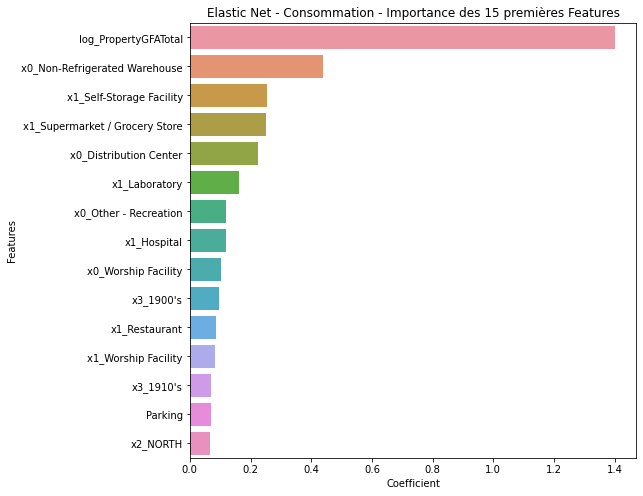

In [34]:
plt.figure(figsize=(8,8))
plt.title('Elastic Net - Consommation - Importance des 15 premières Features')
sns.barplot(y = liste_coefs_el_net['Features'].head(15),
            x = liste_coefs_el_net['Coefficient'].head(15))
plt.show()

## 2.4 RandomForest

In [35]:
#On fixe les valeurs des hyperparamètres à tester
parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    #'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}


# On choisit un score à optimiser, ici R2
score = 'r2'

#On crée une grille avec recherche d'hyperparamètres par validation croisée

random_forest_grid_2 = model_selection.GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               scoring=score,
                              verbose=5,
                               cv=5)

# Optimisation sur le jeu d'entraînement
random_forest_grid_2.fit(X_train_2, y_train_2)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END min_samples_leaf=1, n_estimators=10;, score=0.690 total time=   0.0s
[CV 2/5] END min_samples_leaf=1, n_estimators=10;, score=0.677 total time=   0.0s
[CV 3/5] END min_samples_leaf=1, n_estimators=10;, score=0.645 total time=   0.0s
[CV 4/5] END min_samples_leaf=1, n_estimators=10;, score=0.677 total time=   0.0s
[CV 5/5] END min_samples_leaf=1, n_estimators=10;, score=0.687 total time=   0.0s
[CV 1/5] END min_samples_leaf=1, n_estimators=50;, score=0.718 total time=   0.1s
[CV 2/5] END min_samples_leaf=1, n_estimators=50;, score=0.686 total time=   0.1s
[CV 3/5] END min_samples_leaf=1, n_estimators=50;, score=0.679 total time=   0.1s
[CV 4/5] END min_samples_leaf=1, n_estimators=50;, score=0.670 total time=   0.1s
[CV 5/5] END min_samples_leaf=1, n_estimators=50;, score=0.713 total time=   0.1s
[CV 1/5] END min_samples_leaf=1, n_estimators=100;, score=0.725 total time=   0.3s
[CV 2/5] END min_samples_leaf=1, n_

[CV 5/5] END min_samples_leaf=10, n_estimators=500;, score=0.665 total time=   1.0s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             scoring='r2', verbose=5)

In [36]:
# Afficher les hyperparamètres optimaux
print("Les meilleurs hyperparamètres pour le modèle non linéaire Random Forest ")
random_forest_grid_2.best_params_

Les Meilleurs hyperparamètres pour le modèle non linéaire Random Forest 


{'min_samples_leaf': 1, 'n_estimators': 300}

In [37]:
#prédiction sur le jeu de test avec les meilleurs parametres
y_rand_for_pred_2 = random_forest_grid_2.predict(X_test_2)

In [38]:
# Evaluation du modèle Random Forest sur le jeu de test avec les meilleurs hyperparametres
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test_2, y_rand_for_pred_2)) ))
print("R2 : {:.2f}".format(random_forest_grid_2.score(X_test_2,y_test_2) ))
print("R2 train : "+ str(random_forest_grid_2.best_score_))
print("Temps d'execution :"+ str (random_forest_grid_2.cv_results_['mean_fit_time'].mean())+ " s" )

RMSE : 1.01
R2 : 0.72
R2 train : 0.7002236177951519
Temps d'execution :0.5872884631156922 s


### Feature importance

In [39]:
#Coefficients des features dans le modèle
coefficients_RF = abs(random_forest_grid_2.best_estimator_.feature_importances_)
liste_coefs_RF = pd.concat((pd.DataFrame(model_2_data.columns, columns = ['Features']), 
                      pd.DataFrame(coefficients_RF, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

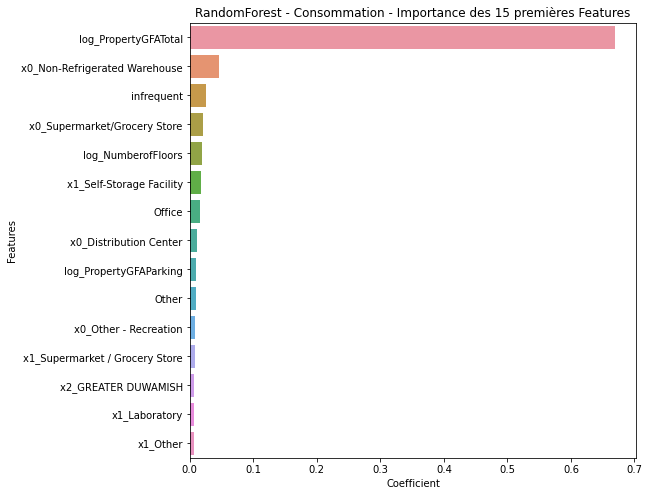

In [40]:
plt.figure(figsize=(8,8))
plt.title('RandomForest - Consommation - Importance des 15 premières Features')
sns.barplot(y = liste_coefs_RF['Features'].head(15),
            x = liste_coefs_RF['Coefficient'].head(15))
plt.show()

In [41]:
# Iter 1 - Elastic Net
print("#### Iter 1 - Elastic Net")
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_el_net_pred)) ))
print("R2 test : {:.2f}".format(elastic_net_grid.score(X_test,y_test) ))
print("R2 train : " + str(elastic_net_grid.best_score_))
print("Temps d'execution :"+ str (elastic_net_grid.cv_results_['mean_fit_time'].mean())+ " s" )
print()

# Iter 1 - Random Forest
print("#### Iter 1 - Random Forest")
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_rand_for_pred)) ))
print("R2 test : {:.2f}".format(random_forest_grid.score(X_test,y_test) ))
print("R2 train : "+ str(random_forest_grid.best_score_))
print("Temps d'execution :"+ str (random_forest_grid.cv_results_['mean_fit_time'].mean())+ " s" )
print()

# Iter 2 - Elastic Net
print("#### Iter 2 - Elastic Net")
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test_2, y_el_net_pred_2)) ))
print("R2 test : {:.2f}".format(elastic_net_grid_2.score(X_test_2,y_test_2) ))
print("R2 train : " + str(elastic_net_grid_2.best_score_))
print("Temps d'execution "+ str(elastic_net_grid_2.cv_results_['mean_fit_time'].mean())+" s")
print()

# Iter 2 - Random Forest
print("#### Iter 2 - Random Forest")
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test_2, y_rand_for_pred_2)) ))
print("R2 test : {:.2f}".format(random_forest_grid_2.score(X_test_2,y_test_2) ))
print("R2 train : "+ str(random_forest_grid_2.best_score_))
print("Temps d'execution :"+ str (random_forest_grid_2.cv_results_['mean_fit_time'].mean())+ " s" )

#### Iter 1 - Elastic Net
RMSE : 1.06
R2 test : 0.70
R2 train : 0.7424963253819621
Temps d'execution :0.01250805105481829 s

#### Iter 1 - Random Forest
RMSE : 1.11
R2 test : 0.67
R2 train : 0.7044477126452161
Temps d'execution :0.46115902185440066 s

#### Iter 2 - Elastic Net
RMSE : 0.97
R2 test : 0.74
R2 train : 0.7291529901702998
Temps d'execution 0.012879537173679899 s

#### Iter 2 - Random Forest
RMSE : 1.01
R2 test : 0.72
R2 train : 0.7002236177951519
Temps d'execution :0.5872884631156922 s
